# Using a calibrated flow model to predict $z_{\rm cosmo}$

In [5]:
# Copyright (C) 2024 Richard Stiskalek
# This program is free software; you can redistribute it and/or modify it
# under the terms of the GNU General Public License as published by the
# Free Software Foundation; either version 3 of the License, or (at your
# option) any later version.
#
# This program is distributed in the hope that it will be useful, but
# WITHOUT ANY WARRANTY; without even the implied warranty of
# MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the GNU General
# Public License for more details.
#
# You should have received a copy of the GNU General Public License along
# with this program; if not, write to the Free Software Foundation, Inc.,
# 51 Franklin Street, Fifth Floor, Boston, MA  02110-1301, USA.
import numpy as np
import matplotlib.pyplot as plt
from h5py import File
from tqdm import tqdm

import csiborgtools

%load_ext autoreload
%autoreload 2
%matplotlib inline

paths = csiborgtools.read.Paths(**csiborgtools.paths_glamdring)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
def load_calibration(catalogue, simname, nsim, ksmooth):
    fname = f"/mnt/extraspace/rstiskalek/csiborg_postprocessing/peculiar_velocity/flow_samples_{catalogue}_{simname}_smooth_{ksmooth}.hdf5"  # noqa
    keys = ["Vext_x", "Vext_y", "Vext_z", "alpha", "beta", "sigma_v"]

    # SN_keys = ['mag_cal', 'alpha_cal', 'beta_cal']
    # SN_keys = []
    calibration_samples = {}
    with File(fname, 'r') as f:
        for key in keys:
            calibration_samples[key] = f[f"sim_{nsim}/{key}"][:][::10]

        # for key in SN_keys:
        #     calibration_samples[key] = f[f"sim_{nsim}/{key}"][:]

    return calibration_samples

## Test running a model

In [135]:
# fpath_data = "/mnt/extraspace/rstiskalek/catalogs/PV_compilation_Supranta2019.hdf5"
fpath_data = "/mnt/extraspace/rstiskalek/catalogs/PV_mock_CB2_17417_large.hdf5"

simname = "csiborg2_main"
catalogue = "CB2_large"

nsims = paths.get_ics(simname)[:-1]
ksmooth = 1

loaders = []
models = []
zcosmo_mean = None
zobs = None

for i, nsim in enumerate(tqdm(nsims)):
    loader = csiborgtools.flow.DataLoader(simname, i, catalogue, fpath_data, paths, ksmooth=ksmooth)
    calibration_samples = load_calibration(catalogue, simname, nsim, ksmooth)
    model = csiborgtools.flow.Observed2CosmologicalRedshift(calibration_samples, loader.rdist, loader._Omega_m)

    if i == 0:
        zcosmo_mean = loader.cat["zcosmo"]
        zobs = loader.cat["zobs"]
        vrad = loader.cat["vrad"]

    loaders.append(loader)
    models.append(model)


  0%|          | 0/19 [00:00<?, ?it/s]

10:32:19: reading the catalogue.
10:32:19: reading the interpolated field.


/mnt/users/rstiskalek/csiborgtools/csiborgtools/flow/flow_model.py:113: UserWarning: The number of radial steps is even. Skipping the first step at 0.0 because Simpson's rule requires an odd number of steps.
  warn(f"The number of radial steps is even. Skipping the first "
  5%|▌         | 1/19 [00:00<00:05,  3.38it/s]

10:32:19: calculating the radial velocity.
10:32:20: reading the catalogue.
10:32:20: reading the interpolated field.


 11%|█         | 2/19 [00:00<00:04,  3.43it/s]

10:32:20: calculating the radial velocity.
10:32:20: reading the catalogue.
10:32:20: reading the interpolated field.


 16%|█▌        | 3/19 [00:00<00:04,  3.47it/s]

10:32:20: calculating the radial velocity.
10:32:20: reading the catalogue.
10:32:20: reading the interpolated field.


 21%|██        | 4/19 [00:01<00:04,  3.44it/s]

10:32:20: calculating the radial velocity.
10:32:20: reading the catalogue.
10:32:20: reading the interpolated field.


 26%|██▋       | 5/19 [00:01<00:04,  3.41it/s]

10:32:21: calculating the radial velocity.
10:32:21: reading the catalogue.
10:32:21: reading the interpolated field.


 32%|███▏      | 6/19 [00:01<00:03,  3.44it/s]

10:32:21: calculating the radial velocity.
10:32:21: reading the catalogue.
10:32:21: reading the interpolated field.


 37%|███▋      | 7/19 [00:02<00:03,  3.33it/s]

10:32:21: calculating the radial velocity.
10:32:21: reading the catalogue.
10:32:21: reading the interpolated field.


 42%|████▏     | 8/19 [00:02<00:03,  3.31it/s]

10:32:22: calculating the radial velocity.
10:32:22: reading the catalogue.
10:32:22: reading the interpolated field.


 47%|████▋     | 9/19 [00:02<00:03,  3.14it/s]

10:32:22: calculating the radial velocity.
10:32:22: reading the catalogue.
10:32:22: reading the interpolated field.


 53%|█████▎    | 10/19 [00:03<00:02,  3.18it/s]

10:32:22: calculating the radial velocity.
10:32:22: reading the catalogue.
10:32:22: reading the interpolated field.


 58%|█████▊    | 11/19 [00:03<00:02,  3.19it/s]

10:32:22: calculating the radial velocity.
10:32:23: reading the catalogue.
10:32:23: reading the interpolated field.


 63%|██████▎   | 12/19 [00:03<00:02,  3.25it/s]

10:32:23: calculating the radial velocity.
10:32:23: reading the catalogue.
10:32:23: reading the interpolated field.


 68%|██████▊   | 13/19 [00:03<00:01,  3.23it/s]

10:32:23: calculating the radial velocity.
10:32:23: reading the catalogue.
10:32:23: reading the interpolated field.


 74%|███████▎  | 14/19 [00:04<00:01,  3.25it/s]

10:32:23: calculating the radial velocity.
10:32:23: reading the catalogue.
10:32:23: reading the interpolated field.


 79%|███████▉  | 15/19 [00:04<00:01,  3.21it/s]

10:32:24: calculating the radial velocity.
10:32:24: reading the catalogue.
10:32:24: reading the interpolated field.


 84%|████████▍ | 16/19 [00:04<00:00,  3.26it/s]

10:32:24: calculating the radial velocity.
10:32:24: reading the catalogue.
10:32:24: reading the interpolated field.


 89%|████████▉ | 17/19 [00:05<00:00,  3.31it/s]

10:32:24: calculating the radial velocity.
10:32:24: reading the catalogue.
10:32:24: reading the interpolated field.


 95%|█████████▍| 18/19 [00:05<00:00,  3.33it/s]

10:32:25: calculating the radial velocity.
10:32:25: reading the catalogue.
10:32:25: reading the interpolated field.


100%|██████████| 19/19 [00:05<00:00,  3.30it/s]

10:32:25: calculating the radial velocity.


In [143]:
n = 400
zcosmo, pzcosmo = csiborgtools.flow.stack_pzosmo_over_realizations(
    n, models, loaders, "zobs")

Stacking:   0%|          | 0/19 [00:00<?, ?it/s]

Stacking: 100%|██████████| 19/19 [00:06<00:00,  3.06it/s]


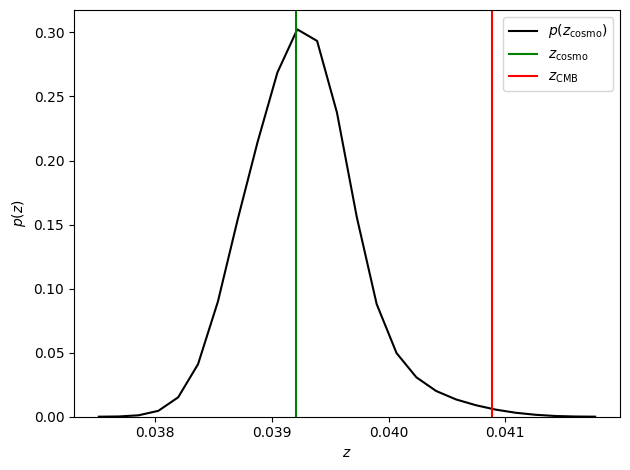

In [144]:
plt.figure()

# for i in range(len(nsims)):
    # mask = pzcosmo[i] > 1e-5
    # plt.plot(zcosmo[mask], pzcosmo[i][mask], color="black", alpha=0.1)

# mu = np.nanmean(pzcosmo, axis=0)
mask = pzcosmo > 1e-5
plt.plot(zcosmo[mask], pzcosmo[mask], color="black", label=r"$p(z_{\rm cosmo})$")

plt.ylim(0)
plt.axvline(zcosmo_mean[n], color="green", label=r"$z_{\rm cosmo}$")
plt.axvline(zobs[n], color="red", label=r"$z_{\rm CMB}$")

plt.xlabel(r"$z$")
plt.ylabel(r"$p(z)$")
plt.legend()
plt.tight_layout()
# plt.savefig("../plots/zcosmo_posterior_mock_example_B.png", dpi=450)
plt.show()